# Research on apartment sales ads

You will have the data from a real estate agency. It is an archive of sales ads for realty in St. Petersburg, Russia, and the surrounding areas collected over the past few years. You’ll need to learn how to determine the market value of real estate properties. Your task is to define the parameters. This will make it possible to build an automated system that is capable of detecting anomalies and fraudulent activity.

There are two different types of data available for every apartment for sale. The first type is a user’s input. The second type is received automatically based upon the map data. For example, the distance from the city center, airport, the nearest park or body of water. 

### Step 1. Open the data file and study the general information. 

In [2]:
# importing relevant packages
import pandas as pd
import numpy as np
#loading data
x= pd.read_csv('/datasets/real_estate_data_us.csv', sep='\t')
#inspecting data
x.head()
x.info()
x.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
date_posted          23699 non-null object
days_listed          20518 non-null float64
last_price           23699 non-null float64
bedrooms             23699 non-null int64
kitchen_area         21421 non-null float64
living_area          21796 non-null float64
total_area           23699 non-null float64
balconies            12180 non-null float64
ceiling_height       14504 non-null float64
floors_total         23613 non-null float64
floor                23699 non-null int64
total_images         23699 non-null int64
bike_parking         2775 non-null object
is_studio            23699 non-null bool
is_open_plan         23699 non-null bool
locality_name        23650 non-null object
airport_dist         18157 non-null float64
city_center_dist     18180 non-null float64
park_dist            8079 non-null float64
parks_within_3000    18181 non-null float64
pond_dist            9110 no

,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,floor,total_images,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000
count,20518.000000,2.369900e+04,23699.000000,21421.000000,21796.000000,23699.000000,12180.000000,14504.000000,23613.000000,23699.000000,23699.000000,18157.000000,18180.000000,8079.000000,18181.000000,9110.000000,18181.000000
mean,180.888634,1.308310e+05,2.070636,10.569807,34.457852,60.348651,1.150082,2.771499,10.673824,5.892358,9.858475,28793.672193,14191.277833,490.804555,0.611408,517.980900,0.770255
std,219.727988,2.177403e+05,1.078405,5.905438,22.030445,35.654083,1.071300,1.261056,6.597173,4.885249,5.682529,12630.880622,8608.386210,342.317995,0.802074,277.720643,0.938346
min,1.000000,2.440000e+02,0.000000,1.300000,2.000000,12.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,181.000000,1.000000,0.000000,13.000000,0.000000
25%,45.000000,6.800000e+04,1.000000,7.000000,18.600000,40.000000,0.000000,2.520000,5.000000,2.000000,6.000000,18585.000000,9238.000000,288.000000,0.000000,294.000000,0.000000
50%,95.000000,9.300000e+04,2.000000,9.100000,30.000000,52.000000,1.000000,2.650000,9.000000,4.000000,9.000000,26726.000000,13098.500000,455.000000,0.000000,502.000000,1.000000
75%,232.000000,1.360000e+05,3.000000,12.000000,42.300000,69.900000,2.000000,2.800000,16.000000,8.000000,14.000000,37273.000000,16293.000000,612.000000,1.000000,729.000000,1.000000
max,1580.000000,1.526000e+07,19.000000,112.000000,409.700000,900.000000,5.000000,100.000000,60.000000,33.000000,50.000000,84869.000000,65968.000000,3190.000000,3.000000,1344.000000,3.000000


### Conclusion

There are a few date/string/boolean columns. All the numerical columns are displayed with their descriptive stats, some have the potential to be converted to categorical, but we will do that on a need basis.

### Step 2. Data preprocessing

In [6]:
#making a vector of the names of the columns that we want to replace the missing values with 0  
zero_col = ['bedrooms', 'balconies','ponds_within_3000', 'total_images']
print(x.columns)
#Filling empty cells with 0
for i in zero_col:
    x[i] = x[i].fillna(value=0)
    #print(x[i].value_counts())
    

Index(['date_posted', 'days_listed', 'last_price', 'bedrooms', 'kitchen_area',
       'living_area', 'total_area', 'balconies', 'ceiling_height',
       'floors_total', 'floor', 'total_images', 'bike_parking', 'is_studio',
       'is_open_plan', 'locality_name', 'airport_dist', 'city_center_dist',
       'park_dist', 'parks_within_3000', 'pond_dist', 'ponds_within_3000'],
      dtype='object')


In [5]:
#converting all float columns to int

#Making a vector of all the columns that are of type float
float_col = x.select_dtypes(include=[np.float])
float_col = list(float_col.columns)
print(float_col)
for i in float_col:
    print(x[i].isnull().sum())
#Filling empty cells with a the average of that column
for i in float_col:
    avg = x[i].mean()
    x[i] = x[i].fillna(value=avg)
#Converting all float columns to int
x[float_col] = x[float_col].astype(int)
    
x.info()

['days_listed', 'last_price', 'kitchen_area', 'living_area', 'total_area', 'balconies', 'ceiling_height', 'floors_total', 'airport_dist', 'city_center_dist', 'park_dist', 'parks_within_3000', 'pond_dist', 'ponds_within_3000']
3181
0
2278
1903
0
0
9195
86
5542
5519
15620
5518
14589
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
date_posted          23699 non-null object
days_listed          23699 non-null int64
last_price           23699 non-null int64
bedrooms             23699 non-null int64
kitchen_area         23699 non-null int64
living_area          23699 non-null int64
total_area           23699 non-null int64
balconies            23699 non-null int64
ceiling_height       23699 non-null int64
floors_total         23699 non-null int64
floor                23699 non-null int64
total_images         23699 non-null int64
bike_parking         2775 non-null object
is_studio            23699 non-null bool
is_open_plan       

For the columns where it made sense for the empty values to be 0, I did so. I considered setting all the distance to park as 0 for the entries that had the boolean saying there were no parks within 3km, but then I realized that in further analysis that would make it look like all the places with no parks were the closest to parks. Finally, I had to fill in the empty values of columns that were of type float with the average since I couldn't convert it to numeric type wihtout doing that. Converting the data type to numeric is essential for further calculations.

### Step 3. Make calculations and add them to the table

In [6]:
# creating the price_per_sq_m ratio
x['price_per_sq_m'] = x['last_price']/x['total_area']
#print(x['price_per_sq_m'].describe())
#print(x['date_posted'].head())

In [7]:
#creating the column that says what day of the week the apartment was sold
x['date_posted'] = pd.to_datetime(x['date_posted'],format='%Y-%m-%dT%H:%M:%S')
x['day_of_week'] = x['date_posted'].dt.day_name()
#creating the column that says what day of the week the apartment was sold, but according to a numeric key
x['num_day'] = x['date_posted'].dt.dayofweek
#creating the column that says the month the apartment was sold
x['month'] = pd.DatetimeIndex(x['date_posted']).month
#creating the column that says what year the apartment was sold
x['year'] = pd.DatetimeIndex(x['date_posted']).year
#print(x['day_of_week'].value_counts())

In [8]:
#function to figure out if a floor is bottom or top
def func(row):
  a = row["floor"]
  b = row["floors_total"]
  if a == b & a != 1:
      return "last"
  elif(a == 1):
    return "first"
  return "other"
 
# column called 'which floor' tells you if it is bottom, top or first
x["which_floor"] = x["floor"]

x["which_floor"].replace(1,'first',inplace=True)
x["which_floor"] = x.apply(func, axis=1)

# column called 'top bool' has top floors =1 and rest = 0
x["top_bool"] = x["which_floor"]
x["top_bool"].replace('last',1,inplace=True)
x["top_bool"].replace('first',0,inplace=True)
x["top_bool"].replace('other',0,inplace=True)

# column called 'bottom bool' has top bottom =1 and rest = 0
x["bottom_bool"] = x["which_floor"]
x["bottom_bool"].replace('first',1,inplace=True)
x["bottom_bool"].replace('last',0,inplace=True)
x["bottom_bool"].replace('other',0,inplace=True)
    

#print(x['which_floor'].value_counts())

In [9]:
x['ratio_living_area'] = x['living_area']/x['total_area']
x['ratio_kitchen_area'] = x['kitchen_area']/x['total_area']

#print(x['ratio_living_area'].value_counts().head())
#print(x['ratio_kitchen_area'].value_counts().head())
print(x.head())
#print(x['ceiling_height'].value_counts())

  date_posted  days_listed  last_price  bedrooms  kitchen_area  living_area  \
0  2019-03-07          180      260000         3            25           51   
1  2018-12-04           81       67000         1            11           18   
2  2015-08-20          558      103920         2             8           34   
3  2015-07-24          424     1298000         3            10           34   
4  2018-06-19          121      200000         2            41           32   

   total_area  balconies  ceiling_height  floors_total  ...  price_per_sq_m  \
0         108          0               2            16  ...     2407.407407   
1          40          2               2            11  ...     1675.000000   
2          56          0               2             5  ...     1855.714286   
3         159          0               2            14  ...     8163.522013   
4         100          0               3            14  ...     2000.000000   

   day_of_week num_day  month  year which_floor  t

### Step 4. Conduct exploratory data analysis and follow the instructions below:

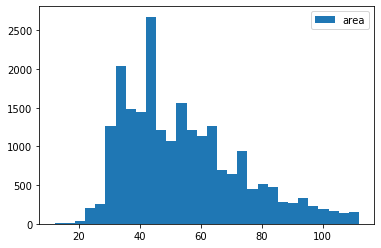

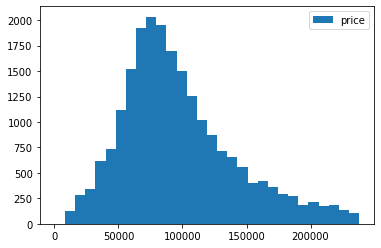

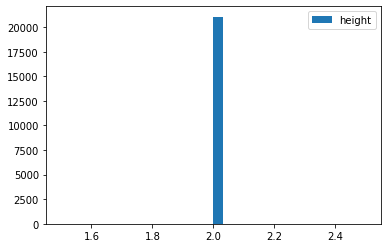

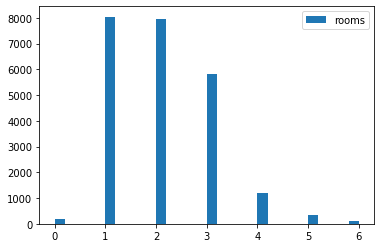

The mean number of days it takes for a house to be sold is:  180.7693573568505
The median number of days it takes for a house to be sold is:  124.0
A sale is quicker than usual if it took less than these many number of days to sell: 45.0
A sale is slower than usual if it took more than these many number of days to sell: 199.0


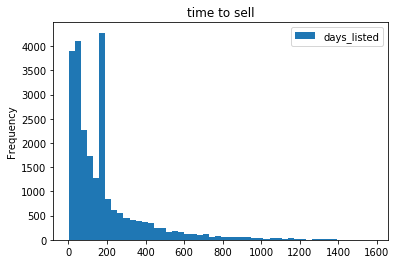

In [10]:
import matplotlib.pyplot as plt
# all this stuff to remove outliers, using inter quantile ranges for the columns listed in vec_from
vec_from = ['total_area','last_price', 'ceiling_height','bedrooms']
area = []
price = []
height = []
rooms = []
vec_to = [area,price, height,rooms]
col_names = ['area','price', 'height','rooms']
j=0
for i in vec_from:
    
    Q1 = x[i].quantile(0.25)
    Q3 = x[i].quantile(0.75)
    IQR = Q3 - Q1
    vec_to[j] = x[i][~((x[i] < (Q1 - 1.5 * IQR)) |(x[i] > (Q3 + 1.5 * IQR)))]
    plt.figure()
    #used the for loop that was removing outliers to plot the histograms
    plt.hist(vec_to[j],bins = 30,label= col_names[j])
    plt.legend()
    plt.show()
    j = j + 1
    
x.plot(kind='hist',y = 'days_listed', bins=50, title ='time to sell')
print('The mean number of days it takes for a house to be sold is: ',x['days_listed'].mean())
print('The median number of days it takes for a house to be sold is: ',x['days_listed'].median())
print('A sale is quicker than usual if it took less than these many number of days to sell:', x['days_listed'].quantile(0.25))
print('A sale is slower than usual if it took more than these many number of days to sell:', x['days_listed'].quantile(0.75))

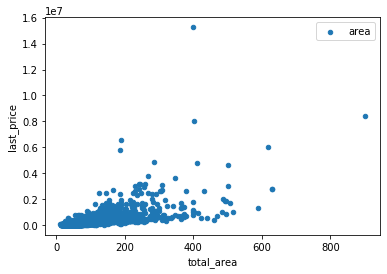

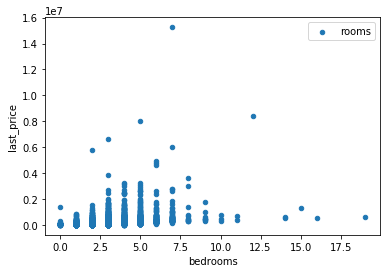

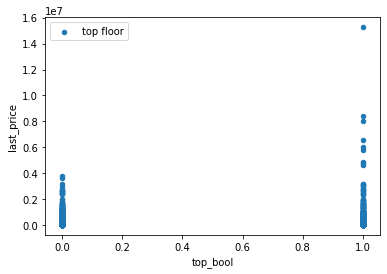

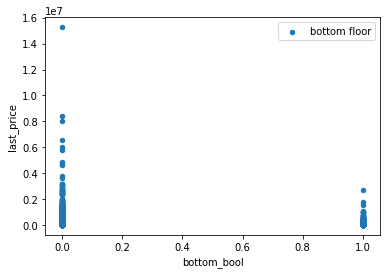

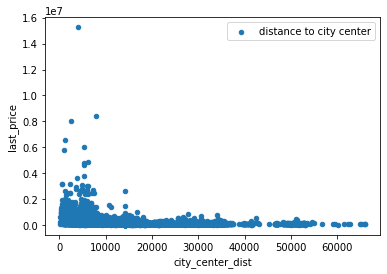

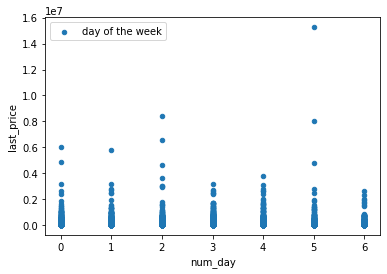

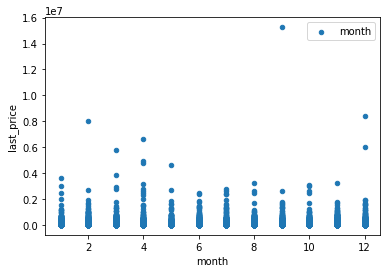

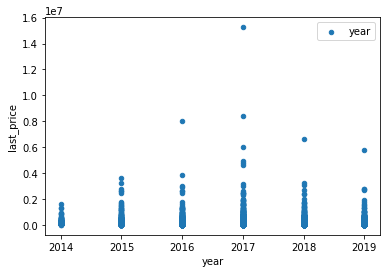

['Saint Petersburg', 'Murino village', 'Shushary village', 'Vsevolozhsk', 'Pushkin', 'Kolpino', 'Pargolovo village', 'Gatchina', 'Kudrovo village', 'Vyborg']


In [11]:
# creating scatter plots against price for the variables in vec_fro
vec_fro = ['total_area','bedrooms', 'top_bool','bottom_bool','city_center_dist','num_day', 'month', 'year' ]
col_name = ['area','rooms', 'top floor','bottom floor','distance to city center','day of the week', 'month', 'year']
j=0
for i in vec_fro:
    x.plot(i, y="last_price", kind="scatter",label = col_name[j] )
    plt.legend()
    plt.show()
    j = j+1


In [ ]:
#Finding out the top ten most advertised cities
top_ten = x['locality_name'].value_counts().sort_values(ascending = False).head(10).index.tolist()


print(top_ten)

In [12]:
# locality_stat has the mean price of all the houses in that locality
locality_stat = x.pivot_table(index='locality_name', values='last_price', aggfunc='mean')
locality = locality_stat.query('locality_name in @top_ten')
print(locality)
print('The locality in the top 10 most advertised that has the highest pricing is:', locality.max())
print('The locality in the top 10 most advertised that has the lowest pricing is:', locality.min())



                      last_price
locality_name                   
Gatchina            69766.732899
Kolpino             79280.426036
Kudrovo village     84683.157191
Murino village      73047.228417
Pargolovo village   89761.495413
Pushkin            129380.720867
Saint Petersburg   161250.141467
Shushary village    82161.636364
Vsevolozhsk         75781.356784
Vyborg              65019.662447
The locality in the top 10 most advertised that has the highest pricing is: last_price    161250.141467
dtype: float64
The locality in the top 10 most advertised that has the lowest pricing is: last_price    65019.662447
dtype: float64


### Step 5. Overall conclusion:
From the histograms, we can see the most apartments are small, and as they get bigger, there are fewer of those apartments. However, price of the apartments are more normally distributed, which leads us to believe that area is not the only factor influencing the cost of a house. 

Once I removed all the outliers, the only houses left were those with a ceiling height of 2 meters. 1 and 2 bedrooms are the most common apartments, and the more befrooms you want, the fewer choices you have.

It takes around 45-200 days to sell a house. The mean time is 180 days and the median is 124. This implies there are some houses that take forever to sell because the mean is almost 2 months more than the median. The outliers are skewing the data. 

Not surprisingly, after plotting the correlation plots, we see that there is a positive correlation with price and area, having a top floor and being closer to the city center. This means the more area you want, the closer you want to live to the city center and if you want to live on the top floor, you are going to have to pay more than if you wouldn't. 

The number of bedrooms, however, had a positive trendline up untill somewhere around 5 rooms, (excluding outliers) and then became weird. So if you want a house with more than 5 bedrooms you won't necessarily be paying as much if the price were increasing lineraly. In fact it looks like it's not increasing at all. Perhaps big houses are hard to sell? 

Day of the week and month have no effect on when people buy. Day of the week seems trivial but the uniformity of sales across months show that people always need houses and the houses are sold to them at the same prices whether they buy in Jan or June. But year, has some insight. Houses were mostly cheap in 2014 and have increased, but stayed somewhat stagnant since then, but then again dropped in 2019.

Of the 10 most advertised localities, Saint Petersburg is the most expensive and Vyborg is the cheapest.






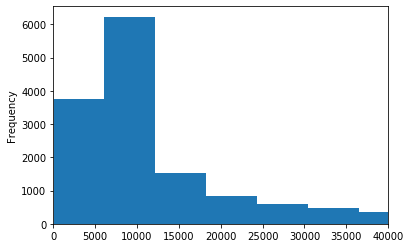

In [15]:
#Creating a dataframe with only apartments in Saint Petersburg
Saint_Petersburg_Cities = x[x['locality_name'] == 'Saint Petersburg'].reset_index()
#Creating a column that has the price of the apartment divided by how far it is from the city center
Saint_Petersburg_Cities['city_center_Whole'] = Saint_Petersburg_Cities['city_center_dist'].astype(int) / 1000  # Divide by 1000m since we want KM
Saint_Petersburg_Cities['avgPricePerKM'] = Saint_Petersburg_Cities['last_price'] / Saint_Petersburg_Cities['city_center_Whole']
Saint_Petersburg_Cities['avgPricePerKM'].plot.hist(bins=1200, xlim=(0,40000))

                       city_center_dist
locality_name                          
Agalatovo village               14191.0
Annino village                  14191.0
Aro village                     14191.0
Baryshevo village               14191.0
Batovo village                  14191.0
...                                 ...
village Vazhiny                 14191.0
village Veshchevo               14191.0
village Villozi                 14191.0
village Vozrozhdeniye           14191.0
village Yam-Tesovo              14191.0

[302 rows x 1 columns]
                          city_center_dist
locality_name                             
Aleksandrovskaya village      27468.000000
Beloostrov village            38868.000000
Kolpino                       32060.745562
Krasnoye Selo                 29842.426966
Kronshtadt                    48831.093750
Levashovo village             25727.000000
Lisiy Nos village             27613.333333
Lomonosov                     50465.165414
Metallostroy village      

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f50089c9f90>,
      dtype=object)

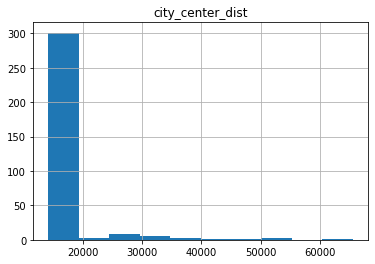

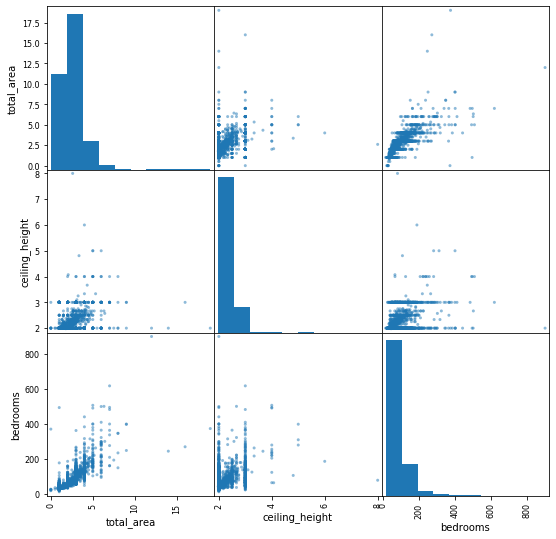

In [13]:
#dist_stat is the mean distance of all the apartments in a certain locality to the city center
#dist_stat = x.pivot_table(index='locality_name', values='city_center_dist', aggfunc='mean')
#dist_stat = dist_stat.query('locality_name != "Saint Petersburg"')
#dist_stat.hist(bins = 10)
#downtown_cities are all the cities that are less than 2 km away from the city center
#further_cities are all the cities that are more than 2 km away from the city center

#downtown_cities = dist_stat.query('city_center_dist < 20000')
#further_cities = dist_stat.query('city_center_dist > 20000')
#print(dist_stat)
#print(downtown_cities)
#print(further_cities)

#creating correlation plots according to the project requirements.
corre = x.pivot_table(index='last_price', values = ['total_area', 'ceiling_height','bedrooms'])
corre.columns = ['total_area', 'ceiling_height','bedrooms']
print(corre.corr())
pd.plotting.scatter_matrix(corre, figsize=(9,9))


It looks like most places within 13 km of the city are in the city center. There is a marked increase in the averge prices of the cities near the city center and a decrease in cities away from the city center.
